Epoch 1/50
50/50 [==============================] - 1s 10ms/step - loss: 0.3929 - accuracy: 0.0100 - val_loss: 0.1758 - val_accuracy: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.0000e+00 - val_loss: -0.1827 - val_accuracy: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: -0.2956 - accuracy: 0.0000e+00 - val_loss: -0.5402 - val_accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: -0.6450 - accuracy: 0.0000e+00 - val_loss: -0.9509 - val_accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: -1.0997 - accuracy: 0.0000e+00 - val_loss: -1.5241 - val_accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: -1.7387 - accuracy: 0.0000e+00 - val_loss: -2.3308 - val_accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: -2.6700 - accuracy: 0.0025 - val_l

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


50/50 [==============================] - 0s 4ms/step - loss: -1695.3096 - accuracy: 0.0206 - val_loss: -1761.4091 - val_accuracy: 0.0175
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: -1783.6439 - accuracy: 0.0206 - val_loss: -1857.3951 - val_accuracy: 0.0175
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: -1875.9475 - accuracy: 0.0206 - val_loss: -1952.9515 - val_accuracy: 0.0175
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: -1970.2253 - accuracy: 0.0206 - val_loss: -2053.0896 - val_accuracy: 0.0175
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: -2069.2869 - accuracy: 0.0206 - val_loss: -2146.9058 - val_accuracy: 0.0175
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: -2167.8401 - accuracy: 0.0206 - val_loss: -2254.7720 - val_accuracy: 0.0175
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: -2272.0029 - accuracy: 0.0206 - val_loss: -2360.916

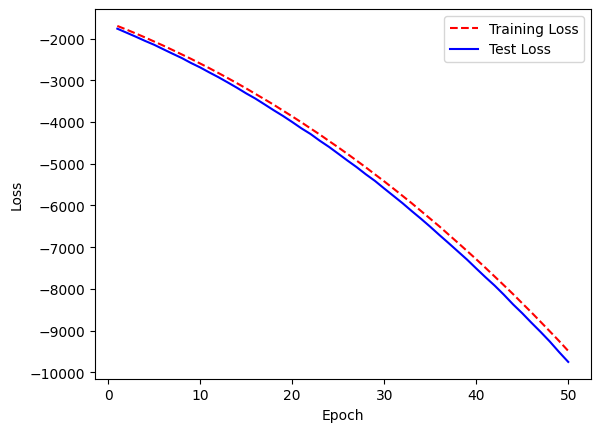

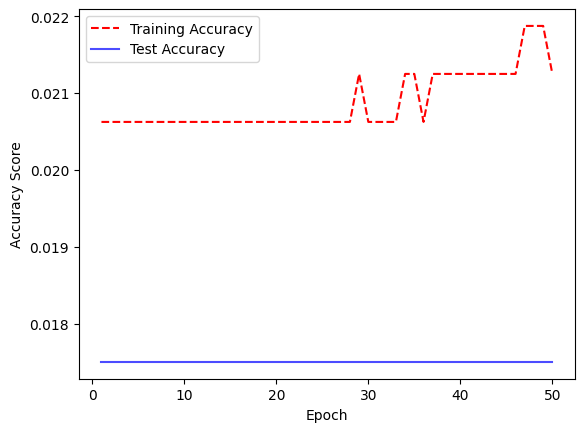

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("biofam.csv", delimiter = ';')

# преобразуем текстовые значения в числа
data['sex'] = data['sex'].apply(lambda x: 1 if x=='man' else 0)
data.drop(columns=['idhous'], inplace=True)
data.drop(columns=['nat_1_02'], inplace=True)
data.drop(columns=['plingu02'], inplace=True)
data.drop(columns=['p02r01'], inplace=True)
data.drop(columns=['p02r04'], inplace=True)
data.drop(columns=['cspfaj'], inplace=True)
data.drop(columns=['cspmoj'], inplace=True)


# Выборки для модели
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Кодирование категориальных признаков
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 2, 7])], remainder='passthrough')
X = ct.fit_transform(X)

# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание модели
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16, activation='relu', input_shape=[X.shape[1]]),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Оценка качества модели на тестовых данных
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

# Пример использования модели для предсказания класса
test_sample = np.array([1, 1990, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]).reshape(1, -1)
test_sample = ct.transform(test_sample) # преобразование категориальных признаков
test_sample = scaler.transform(test_sample) # масштабирование

predicted_class = model.predict(test_sample)[0][0]

# Вероятность принадлежности к классу 1
print('Predicted class probability:', predicted_class)

# Округление вероятности и превращение в целочисленный класс
predicted_class = int(np.round(predicted_class))
print('Predicted class:', predicted_class)

# График точности и функции потерь
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
training_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-', alpha=0.7)
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()